In [0]:
%matplotlib inline
from fastai.basics import *

In [0]:
n=100

In [5]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.6246,  1.0000],
        [ 0.9953,  1.0000],
        [-0.3960,  1.0000],
        [ 0.5488,  1.0000],
        [ 0.9020,  1.0000]])

In [28]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

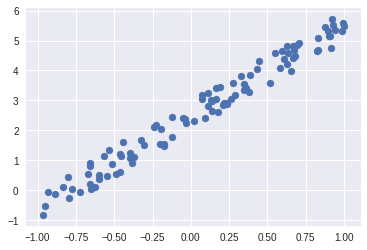

In [32]:
plt.scatter(x[:,0], y);

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [35]:
y_hat = x@a
mse(y_hat, y)

tensor(8.6142)

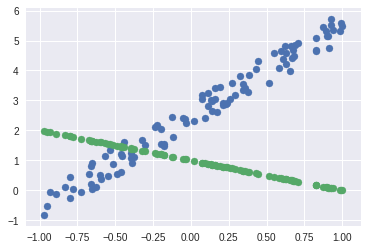

In [36]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

In [37]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [39]:
lr = 1e-1
for t in range(100): update()

tensor(8.6142, grad_fn=<MeanBackward1>)
tensor(1.4253, grad_fn=<MeanBackward1>)
tensor(0.4348, grad_fn=<MeanBackward1>)
tensor(0.1796, grad_fn=<MeanBackward1>)
tensor(0.1113, grad_fn=<MeanBackward1>)
tensor(0.0930, grad_fn=<MeanBackward1>)
tensor(0.0880, grad_fn=<MeanBackward1>)
tensor(0.0867, grad_fn=<MeanBackward1>)
tensor(0.0864, grad_fn=<MeanBackward1>)
tensor(0.0863, grad_fn=<MeanBackward1>)


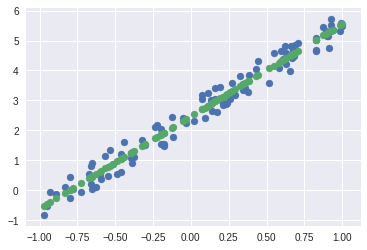

In [40]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [42]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)